<a href="https://colab.research.google.com/github/hygo2025/analise-dados-sprint3/blob/main/notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

## 1. Definição do Problema

**Objetivo**: Analisar o desempenho de produtos vendidos na plataforma da Amazon, focando em identificar fatores que impactam suas avaliações e popularidade.

**Questões principais**:
- Existem padrões nos dados que indicam quais produtos têm mais probabilidade de sucesso ou fracasso em termos de avaliações e vendas?
- Produtos com maiores descontos atraem mais avaliações e melhores notas?
- Certas categorias de produtos, como Eletrônicos e Acessórios, tendem a ter mais avaliações ou avaliações mais positivas?

**Dataset utilizado**: A análise foi realizada utilizando o dataset [Amazon Sales Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) disponível no repositório Kaggle. Esse dataset contém informações detalhadas sobre produtos vendidos na Amazon, como:

- `product_id`: ID único do produto
- `product_name`: Nome do produto
- `category`: Categoria do produto
- `discounted_price`: Preço do produto com desconto
- `actual_price`: Preço original do produto antes do desconto
- `discount_percentage`: Percentual de desconto oferecido
- `rating`: Avaliação média do produto
- `rating_count`: Número de avaliações recebidas pelo produto
- `about_product`: Descrição do produto
- `user_id`: ID único do usuário que deixou a avaliação
- `review_title`: Título da avaliação
- `review_content`: Descrição detalhada da avaliação do produto

A análise visa explorar como esses fatores influenciam a popularidade e as avaliações dos produtos na plataforma, ajudando a compreender padrões de consumo e estratégias de precificação.


## 2. Carga de Dados

Os dados foram extraidos através da plataforma Kaggle, disponível em: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset, onde foi realizado o download e armazenado dentro da pasta data/amazon.csv.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [35]:
path = 'https://raw.githubusercontent.com/hygo2025/analise-dados-sprint3/refs/heads/main/data/amazon.csv'
df = pd.read_csv(path)

In [36]:
# Exibindo as linhas iniciais
df.head(10)

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
5  B08Y1TFSP6  pTron Solero TB301 3A Type-C Data and Fast Cha...   
6  B08WRWPM22  boAt Micro USB 55 Tangle-free, Sturdy Micro US...   
7  B08DDRGWTJ             MI Usb Type-C Cable Smartphone (Black)   
8  B008IFXQFU  TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...   
9  B082LZGK39  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   
5  Computers&Accessories|Accessories&Peripherals|...             ₹149   
6  Computers&Accessories|Accessories&Peripherals|...          ₹176.63   
7  Computers&Accessories|Accessories&Peripherals|...             ₹229   
8  Computers&Accessories|NetworkingDevices|Networ...             ₹499   
9  Computers&Accessories|Accessories&Peripherals|...             ₹199   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   
5       ₹1,000                 85%    3.9       24,871   
6         ₹499                 65%    4.1       15,188   
7         ₹299                 23%    4.3       30,411   
8         ₹999                 50%    4.2     1,79,691   
9         ₹299                 33%    4.0       43,994   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   
5  Fast Charging & Data Sync: Solero TB301 Type-C...   
6  It Ensures High Speed Transmission And Chargin...   
7  1m long Type-C USB Cable|Sturdy and Durable. W...   
8  USB WiFi Adapter —— Speedy wireless transmissi...   
9  Universal Compatibility – It is compatible wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
5  AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...   
6  AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...   
7  AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AF74RSGCHPZITVFSZ...   
8  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...   
9  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   
5  Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...   
6  Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...   
7  Pavan A H,Jayesh bagad,Shridhar,rajendran,karu...   
8  Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...   
9  ArdKn,Nirbhay 

In [37]:
# Exibindo as linhas finais
df.tail(10)

product_id                                       product_name  \
1455  B00GHL8VP2  USHA 1212 PTC with Adjustable Thermostat Fan H...   
1456  B0B9JZW1SQ  4 in 1 Handheld Electric Vegetable Cutter Set,...   
1457  B00TI8E7BI  Philips HD9306/06 1.5-Litre Electric Kettle (M...   
1458  B07J9KXQCC  Libra Room Heater for Home, Room Heaters Home ...   
1459  B0B3JSWG81  NGI Store 2 Pieces Pet Hair Removers for Your ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
1455  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...        ₹3,487.77   
1456  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             ₹498   
1457  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,695   
1458  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...             ₹949   
1459  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...             ₹199   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
1455       ₹4,990                 30%    4.1        1,127   
1456       ₹1,200                 59%    3.2          113   
1457       ₹2,695                  0%    4.4        2,518   
1458       ₹2,299                 59%    3.6          550   
1459         ₹999                 80%    3.1            2   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
1455  Meant for Spot Heating|Room Size: Upto 15 sq f...   
1456  { 4 in 1 multi-function Electric Vegetable Cut...   
1457  Food grade stainless steel, Frequency: 50 Hz. ...   
1458  Libra room heater for home has cool, warm or h...   
1459  Versatile, Protects Your Clothes: MoveCatcher ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
1455  AECFYIUCHSZXDLACTYPEUSM5DIKA,AF546S43YKYCJWRD7...   
1456  AFCTMQKPVJI6Y2JPIGDKRKIAV43A,AF6XUHN32GSFA7LFG...   
1457  AHYXOMUJUKZHBWHP43ZAB265EDGA,AG4C27NTZZ7HTG6W3...   
1458  AE5FZ5B3EEES45Q26PNUBTJ5DRYA,AGL2B432J2VDHOSUW...   
1459                       AFPKVN5KLHB4MHSYDS25Q5MIWWKQ   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
1455  Manoj Kumar,Arun Thottakathu Prasannakumar,son...   
1456  Ashish,Kavita J.,Sundar,Tessy S.,saurabh manro...   
1457  AmazonCust,DD_Zen,Amazon Customer,VINISH THOMA...   
1458  gitesh jaiswal,Divyansh,Dr Paras,Amazon Custom...   
1459                                          Kunal Sen   
1460  Prabha ds,Raghuram bk,Real Deal,Amazon Custome...   
14

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### 3. Estatísticas Descritivas

Aqui vamos mostrar as estatísticas descritivas do dataset, dando uma visão geral das principais características das variáveis analisadas.

As estatísticas descritivas incluem:

- **Medidas de tendência central**: Usadas para mostrar o ponto "típico" dos dados, ou seja, onde a maioria dos valores se concentra.
  - **Média**: Soma de todos os valores dividida pelo número total de entradas. Dá uma ideia geral de qual é o valor médio dos dados.
  - **Mediana**: O valor que está bem no meio quando os dados são colocados em ordem. É útil para evitar distorções por valores muito altos ou baixos.

- **Medidas de dispersão**: Mostram o quão espalhados os dados estão em relação à média.
  - **Desvio padrão**: Indica o quanto os valores, em média, se afastam da média. Um desvio padrão baixo significa que os dados estão mais próximos da média, enquanto um alto mostra que há mais variação.
  - **Intervalo interquartil (IQR)**: A diferença entre o terceiro e o primeiro quartil, cobrindo os 50% centrais dos dados, ignorando valores muito extremos.

- **Verificação de valores nulos**: Identifica dados faltantes no conjunto. Esses valores podem afetar a análise, então precisam ser tratados corretamente, seja removendo ou substituindo.

- **Identificação de inconsistências**: Busca dados que não seguem o padrão esperado, como valores fora do intervalo normal ou duplicados. Resolver essas inconsistências ajuda a garantir resultados mais precisos.


#### 3.1. Quantidade de dados

O dataset possui 1465 instâncias e 16 atributos. Os atributos são:

| Nome da Coluna       | Descrição                                  | Tipo de Dado | Valores Nulos | Valor Mínimo | Valor Máximo |
|----------------------|--------------------------------------------|--------------|---------------|--------------|--------------|
| product_id           | ID do Produto                              | object       | 0             | -            | -            |
| product_name         | Nome do Produto                            | object       | 0             | -            | -            |
| category             | Categoria do Produto                       | object       | 0             | -            | -            |
| discounted_price     | Preço com Desconto                         | float64      | 0             | 39.0         | 77990.0      |
| actual_price         | Preço Original                             | float64      | 0             | 39.0         | 139900.0     |
| discount_percentage  | Percentual de Desconto                     | float64      | 0             | 0            | 94.0         |
| rating               | Avaliação do Produto                       | float64      | 0             | 2            | 5.0          |
| rating_count         | Número de Avaliações no Amazon             | float64      | 0             | 2            | 426973.0     |
| about_product        | Descrição do Produto                       | object       | 0             | -            | -            |
| user_id              | ID do Usuário que escreveu a avaliação     | object       | 0             | -            | -            |
| user_name            | Nome do Usuário que escreveu a avaliação   | object       | 0             | -            | -            |
| review_id            | ID da Avaliação do Usuário                 | object       | 0             | -            | -            |
| review_title         | Título da Avaliação                        | object       | 0             | -            | -            |
| review_content       | Conteúdo Detalhado da Avaliação            | object       | 0             | -            | -            |
| img_link             | Link da Imagem do Produto                  | object       | 0             | -            | -            |
| product_link         | Link Oficial do Produto                    | object       | 0             | -            | -            |


In [39]:
# Verificando a quantidade de dados
df.shape

(1465, 16)

In [40]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [41]:
# Verificando os valores nulos

df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

#### 3.2. Ajustando tipo de dados
Percebemos que muitos dos dados estão classificados como texto, quando na verdade alguns são valores numéricos. Vamos ajustar os tipos de dados para garantir que as análises possam ser feitas de forma correta.

Além disso, também vamos converter os valores que estão em formato de moeda para números, facilitando a manipulação desses dados nas análises.

In [42]:
def clean_and_convert_numeric(df, column, dtype):
    """
    Limpa a coluna removendo tudo que não for numérico e define o tipo de dado especificado,
    convertendo valores inválidos para NaN.

    Parâmetros:
    df (DataFrame): O DataFrame que contém a coluna a ser ajustada.
    column (str): O nome da coluna que será ajustada.
    dtype: O tipo de dado para o qual a coluna será convertida (ex: float, int).

    Retorna:
    DataFrame com a coluna ajustada e convertida para o tipo de dado especificado.
    """
    # Remover tudo que não for numérico (inclui remover letras, símbolos, etc.) e converter para NaN onde necessário
    df[column] = df[column].replace(r'[^0-9.]', '', regex=True)

    # Converter para numérico, setando valores inválidos como NaN
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(dtype)
    return df


In [43]:
df = clean_and_convert_numeric(df, 'discounted_price', float)
df = clean_and_convert_numeric(df, 'actual_price', float)
df = clean_and_convert_numeric(df, 'discount_percentage', float)
df = clean_and_convert_numeric(df, 'rating', float)

# Vale salientar que aqui tratei como float pois caso existam valores NaN o pandas não aceita conversão para int
df['rating_count'] = df['rating_count'].replace({',': ''}, regex=True).astype(float)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [45]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       24269.0   
1         349.0                 43.0     4.0       43994.0   
2        1899.0                 90.0     3.9        7928.0   
3         699.0                 53.0     4.2       94363.0   
4         399.0                 61.0     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [46]:
# Pegando os valores minimos máximos

pd.DataFrame({
    'Coluna': ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count'],
    'Valor Mínimo': [
        df['discounted_price'].min(),
        df['actual_price'].min(),
        df['discount_percentage'].min(),
        df['rating'].min(),
        df['rating_count'].min()
    ],
    'Valor Máximo': [
        df['discounted_price'].max(),
        df['actual_price'].max(),
        df['discount_percentage'].max(),
        df['rating'].max(),
        df['rating_count'].max()
    ]
}).head()


Coluna  Valor Mínimo  Valor Máximo
0     discounted_price          39.0       77990.0
1         actual_price          39.0      139900.0
2  discount_percentage           0.0          94.0
3               rating           2.0           5.0
4         rating_count           2.0      426973.0

#### 3.2. Resumo Estatístico
Esse código utiliza a função describe() do Pandas para gerar um resumo estatístico das colunas numéricas do dataset, fornecendo uma visão geral das características centrais e da dispersão dos valores.

In [47]:
df.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635            47.691468     4.096585   
std         6944.304394   10874.826864            21.635905     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1650.000000            50.000000     4.100000   
75%         1999.000000    4295.000000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000

Analisando o resumo estatístico do dataset, conseguimos identificar algumas informações importantes sobre os dados:

1. **Preço com Desconto**:

   - **Média**: O preço médio com desconto é de aproximadamente ₹3.125,31, o que mostra que muitos produtos têm preços acessíveis após o desconto.
   - **Desvio-padrão**: Há uma grande variação nos preços, com um desvio-padrão de ₹6.944,30.
   - **Mínimo**: O preço mais baixo com desconto é de apenas ₹39, indicando que alguns produtos estão com preços bem baixos.
   - **Percentis**:
     - 25% dos produtos têm preços abaixo de ₹325.
     - 50% dos produtos custam menos de ₹799, o que mostra que a mediana está bem abaixo da média, sugerindo a presença de alguns produtos com preços altos que elevam a média.
     - 75% dos produtos têm preços abaixo de ₹1.999.
   - **Máximo**: O preço mais alto com desconto chega a ₹77.990, indicando produtos de alto valor no dataset.

2. **Preço Original**:

   - **Média**: O preço original médio é de ₹5.444,99, significativamente mais alto do que os preços com desconto, mostrando que os descontos são grandes.
   - **Desvio-padrão**: A variação é bem grande, com um desvio-padrão de ₹10.874,83.
   - **Mínimo**: O preço original mais baixo também é ₹39.
   - **Percentis**:
     - 25% dos produtos têm preços abaixo de ₹800.
     - A mediana está em ₹1.650, mostrando que a maioria dos produtos tem preços mais acessíveis do que a média sugere.
     - 75% dos produtos custam menos de ₹4.295.
   - **Máximo**: O preço mais alto no dataset é ₹139.900.

3. **Percentual de Desconto**:

   - **Média**: Em média, os produtos têm um desconto de 47,69%, quase metade do preço original.
   - **Desvio-padrão**: A variação nos descontos é de 21,64%, indicando que os descontos variam bastante.
   - **Mínimo**: O menor desconto é 0%, ou seja, alguns produtos não têm desconto.
   - **Percentis**:
     - 25% dos produtos têm descontos abaixo de 32%.
     - A mediana é 50%, o que está em linha com a média, sugerindo que a distribuição dos descontos é bem equilibrada.
     - 75% dos produtos têm descontos abaixo de 63%.
   - **Máximo**: O maior desconto é de 94%, mostrando que alguns produtos têm grandes cortes no preço original.

4. **Avaliação do Produto**:

   - **Média**: A média de avaliação dos produtos é 4,1, o que indica que, no geral, os produtos são bem recebidos pelos clientes.
   - **Desvio-padrão**: A variação nas notas é pequena, com um desvio-padrão de 0,29, o que sugere uma certa consistência nas avaliações.
   - **Mínimo**: A menor avaliação registrada é 2,0.
   - **Percentis**:
     - 25% dos produtos têm avaliações abaixo de 4,0.
     - A mediana é 4,1, o que está muito próximo da média.
     - 75% dos produtos têm avaliações abaixo de 4,3.
   - **Máximo**: A nota mais alta é 5,0, indicando que alguns produtos receberam a avaliação máxima.

5. **Número de Avaliações**:

   - **Média**: Em média, os produtos receberam 18.295 avaliações, mostrando que alguns são bem populares.
   - **Desvio-padrão**: O desvio-padrão é bem alto (42.753,86), o que reflete uma variação grande no número de avaliações por produto.
   - **Mínimo**: O produto menos avaliado tem apenas 2 avaliações.
   - **Percentis**:
     - 25% dos produtos têm menos de 1.186 avaliações.
     - A mediana é 5.179 avaliações, mostrando que boa parte dos produtos tem um número considerável de feedbacks.
     - 75% dos produtos têm menos de 17.336 avaliações.
   - **Máximo**: O produto mais popular tem 426.973 avaliações.


## 4. Gráficos e Visualizações

#### 4.1 Histogramas

Os histogramas são ótimos para mostrar como os valores estão distribuídos ao longo de diferentes intervalos, facilitando a visualização de padrões nos dados.
É possível perceber que a maior parte dos produtos se concentra em algumas faixas de preços e avaliações. Isso nos dá uma ideia geral de onde estão os valores mais comuns.

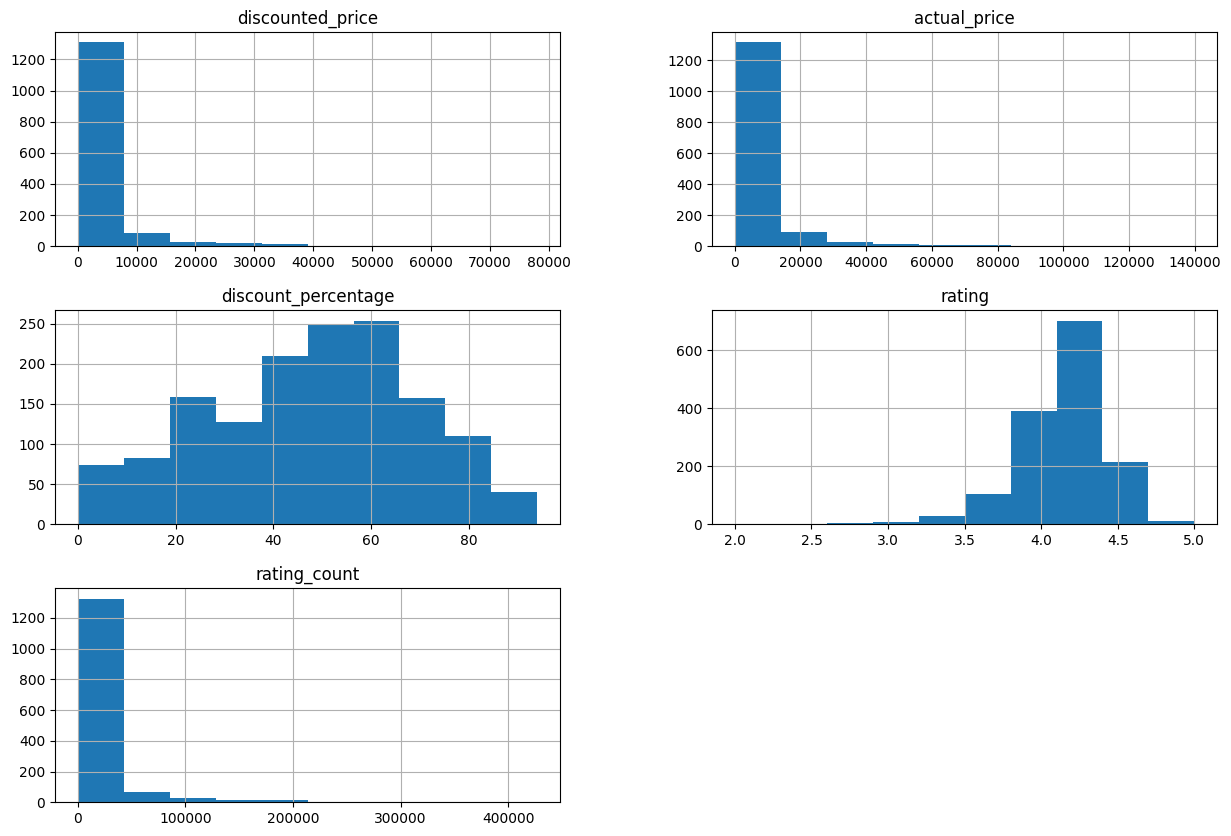

In [48]:
df.hist(figsize=(15,10))
plt.show()

#### 4.2 Gráficos de densidade

Os gráficos de densidade são usados para visualizar de forma suave como os valores se distribuem ao longo de um intervalo. Eles são úteis para detectar padrões e possíveis múltiplos picos.

Analisando a curva de densidade, podemos observar que muitas variáveis seguem uma distribuição assimétrica, com algumas caudas longas, indicando uma grande variação entre os produtos.

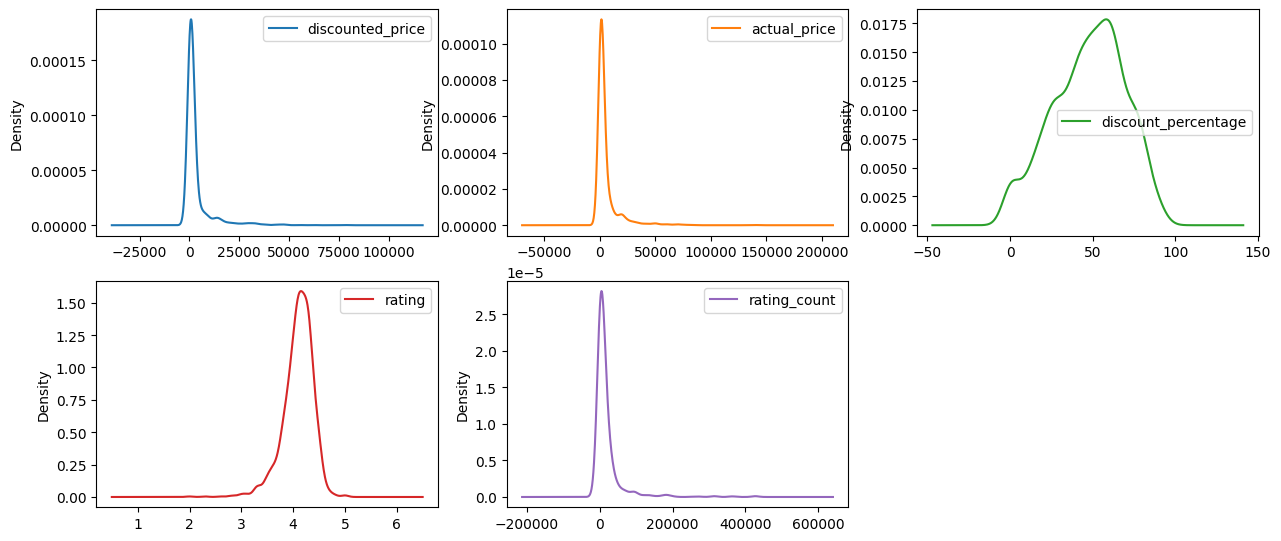

In [49]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,10))
plt.show()

#### 4.3 Boxplots

O gráfico de boxplot ajuda a visualizar a dispersão dos dados e a identificar possíveis outliers de maneira clara e objetiva.

Os boxplots mostram que algumas colunas, como o preço original e o preço com desconto, possuem outliers bastante evidentes. A maior parte dos valores, no entanto, está concentrada em uma faixa menor, sugerindo que a maioria dos produtos está dentro de uma faixa de preço similar.



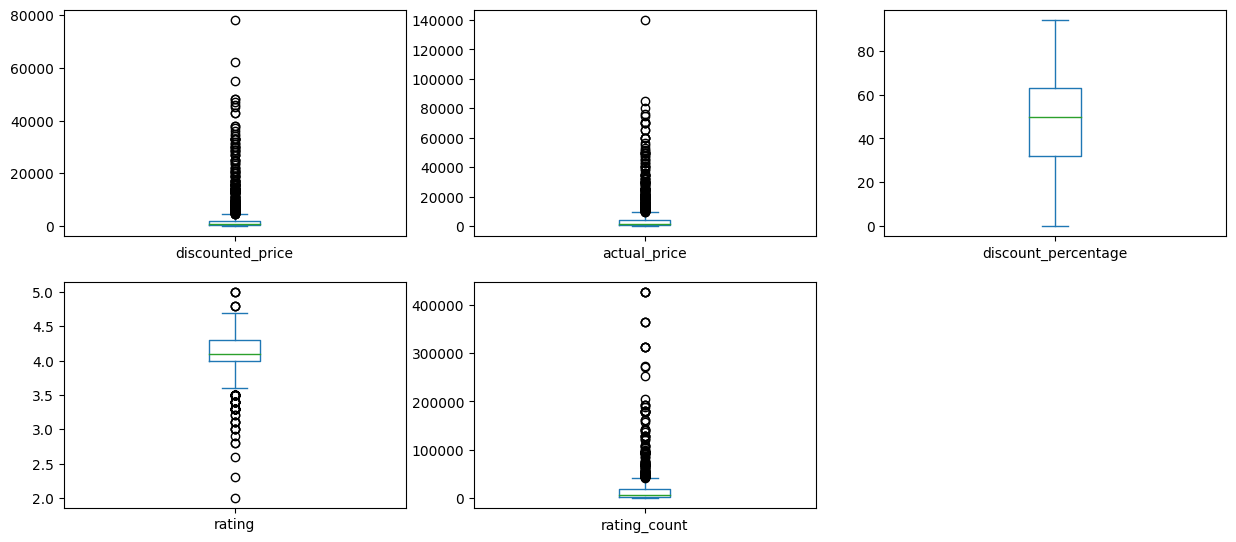

In [50]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(15,10))
plt.show()

#### 4.4 Matriz de Correlação com Seaborn

A matriz de correlação permite visualizar a relação entre variáveis numéricas e é especialmente útil para identificar padrões de correlação entre diferentes colunas.

A matriz de correlação revela que o preço original e o preço com desconto têm uma forte correlação, o que era esperado. Também conseguimos ver outras relações menos evidentes entre outras variáveis.

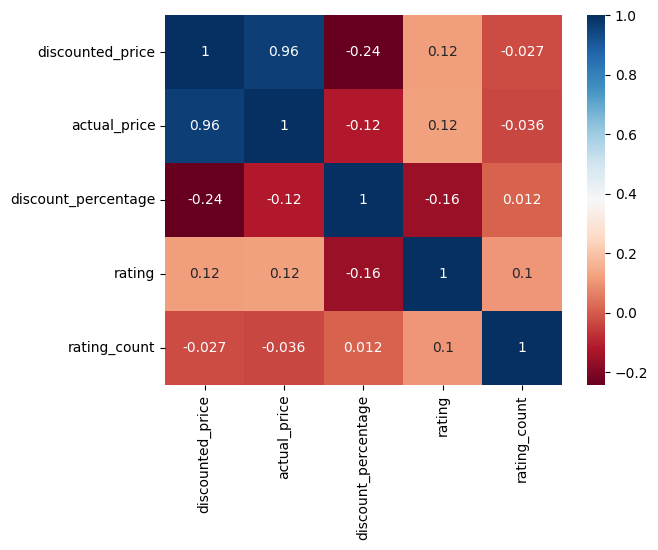

In [51]:
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu')
plt.show()


#### 4.5 Gráfico de Dispersão: Scatter Plot

O scatter plot é ótimo para explorar como duas variáveis se relacionam. Aqui, usamos o Seaborn para visualizar a relação entre diferentes colunas.

Esse gráfico mostra claramente como algumas variáveis se correlacionam, como o preço com desconto e o preço original. Podemos ver padrões de comportamento que ajudam a entender a estrutura dos dados.

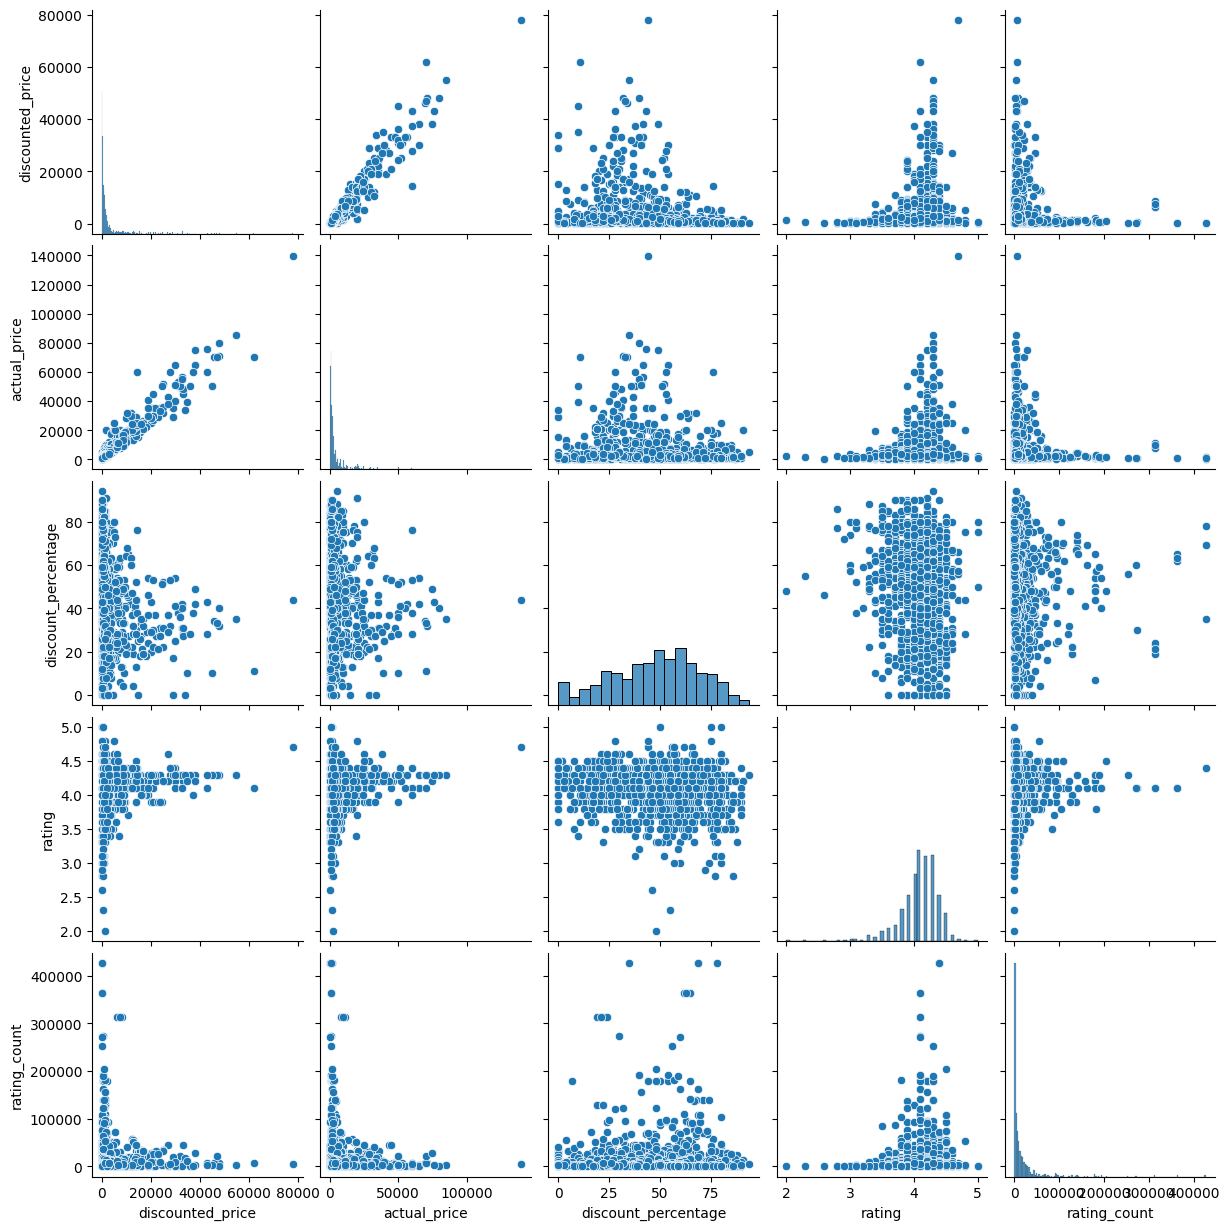

In [52]:
sns.pairplot(df)
plt.show()

#### 4.6 Gráfico de Dispersão: Scatter Plot com Categorias

Outro scatter plot, agora com a adição de categorias, nos ajuda a ver como diferentes grupos de produtos se comportam.

Nesse gráfico, os diferentes grupos de produtos são destacados por cores, facilitando a identificação de tendências e diferenças entre as categorias. Podemos observar como certas categorias têm faixas de preço bem específicas.



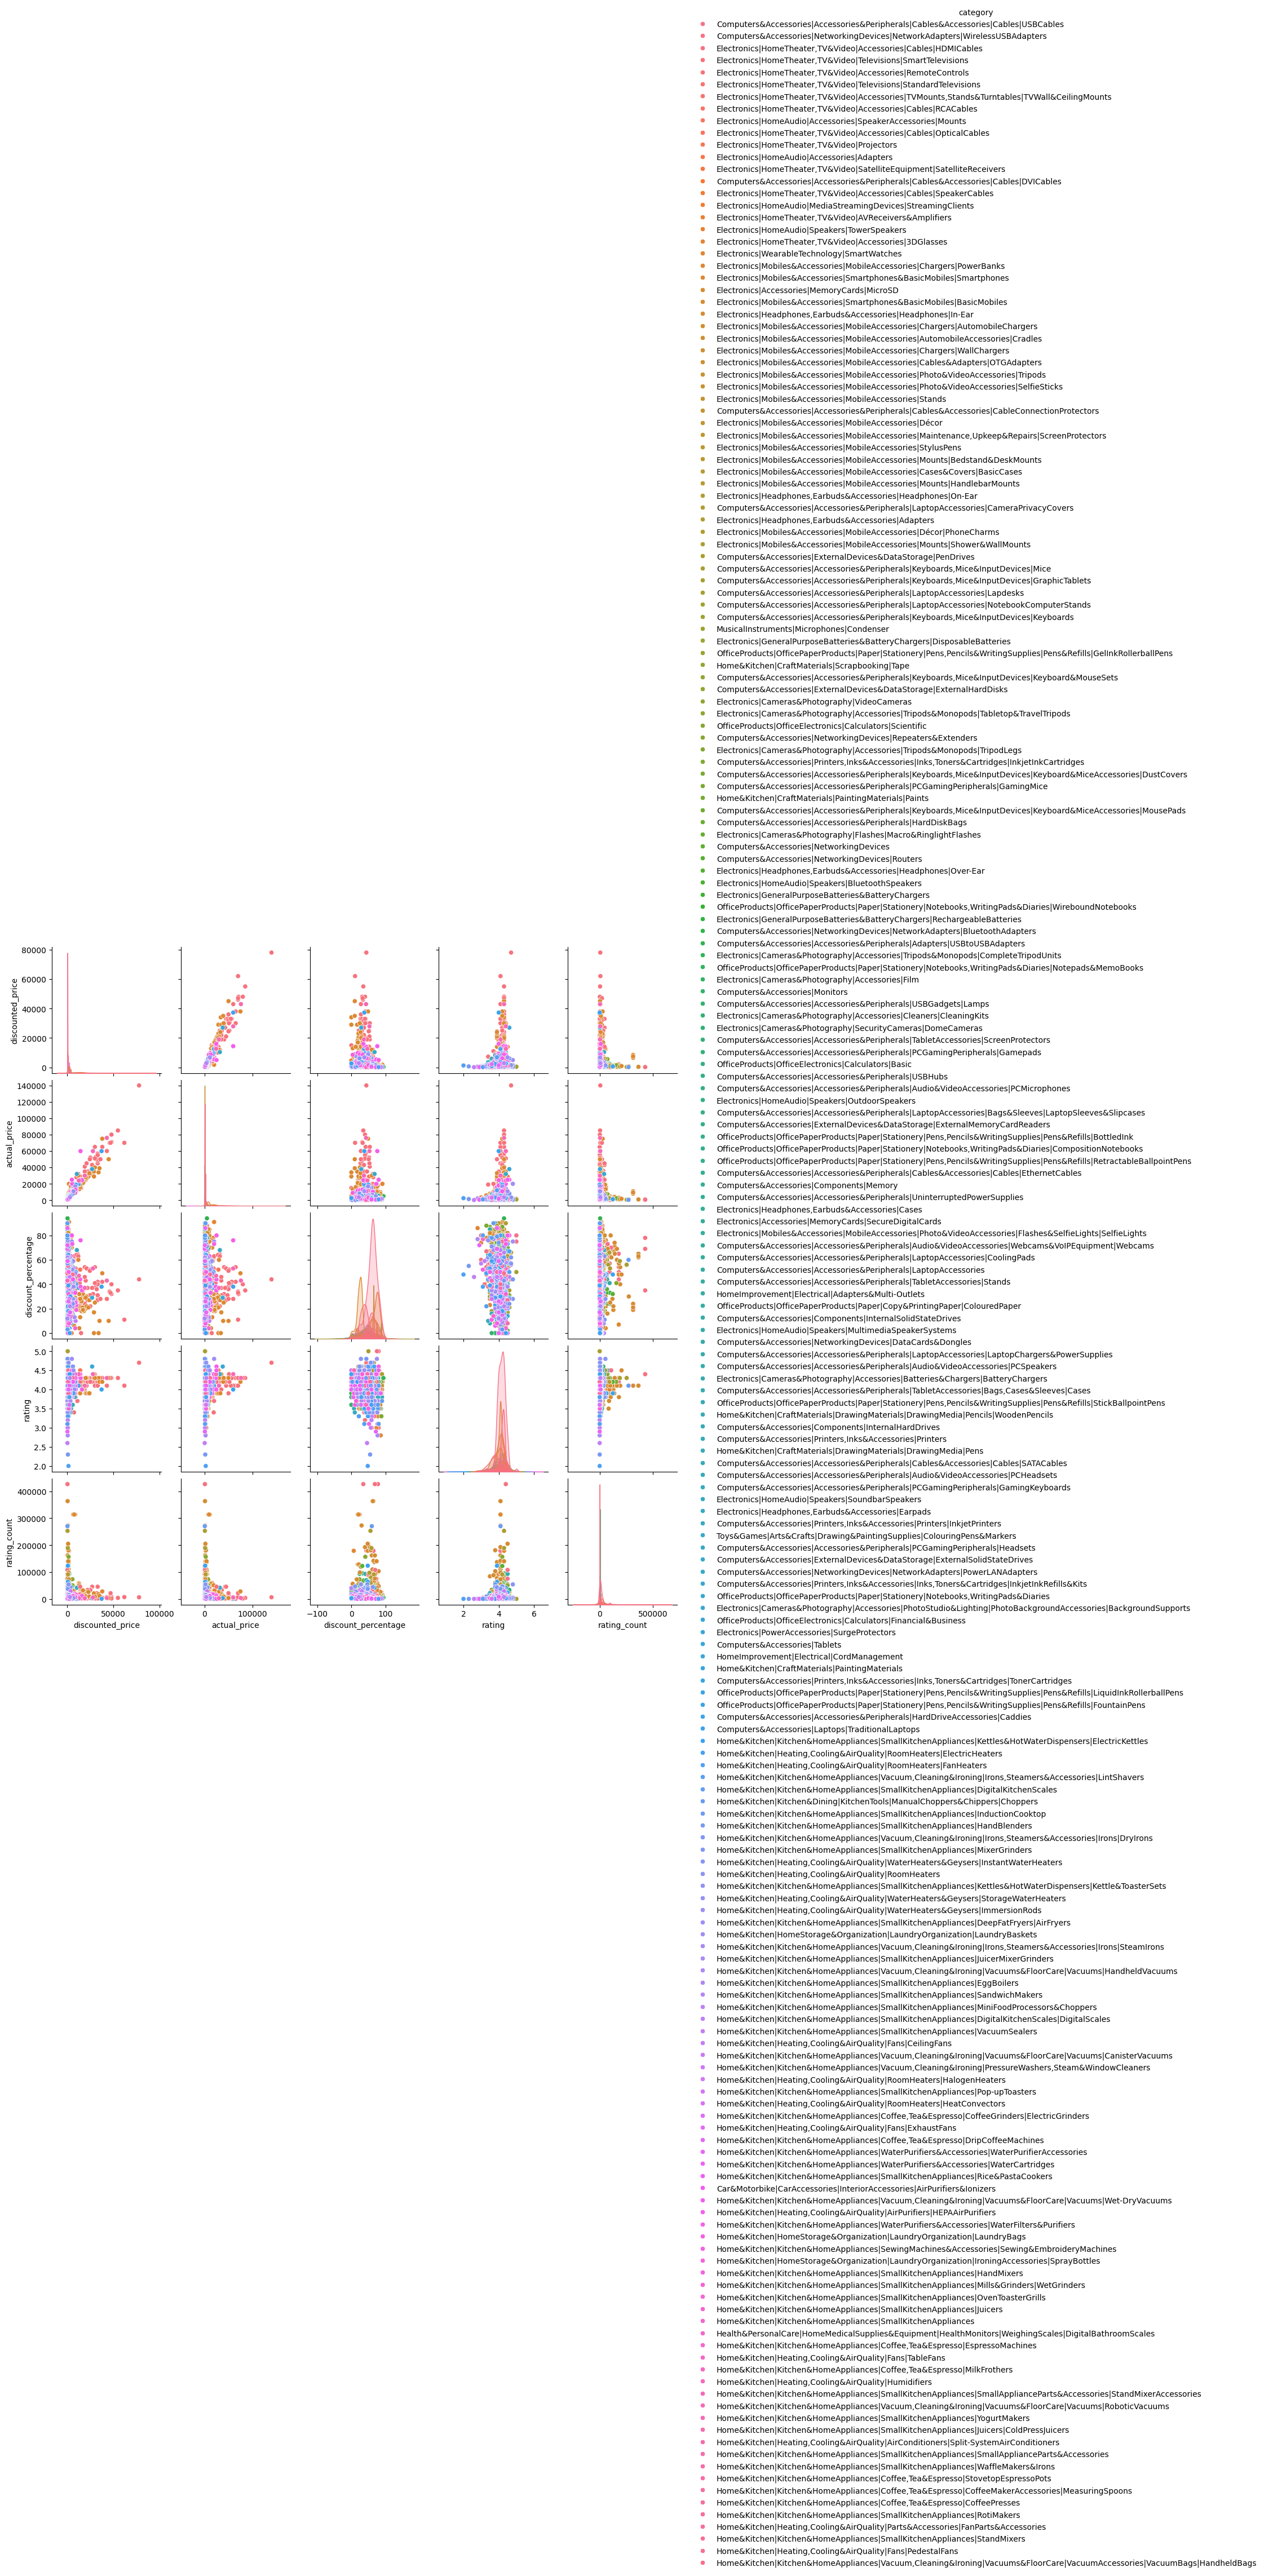

In [53]:
sns.pairplot(df, hue="category", height=2.5)
plt.show()

## 5. Pré-processamento de Dados

Começaremos o pré-processamento dos dados descartando colunas que não serão úteis para a análise, como IDs e links, e tratando valores nulos e outliers.

In [54]:
colunas_descartadas = ['product_id', 'product_name', 'user_id', 'user_name', 'review_id',
                       'review_title', 'review_content', 'img_link', 'product_link', 'about_product']

# Removendo as colunas
df = df.drop(columns=colunas_descartadas)

df.head()

category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  
0        1099.0                 64.0     4.2       24269.0  
1         349.0                 43.0     4.0       43994.0  
2        1899.0                 90.0     3.9        7928.0  
3         699.0                 53.0     4.2       94363.0  
4         399.0                 61.0     4.2       16905.0

#### 5.1 Tratando as categorias

As categorias são muito granulares e isso não é tão útil para a análise. Vamos agrupar as categorias em categorias mais amplas para facilitar a visualização e a interpretação dos dados.
Decidi usar somente os dois primeiro níveis de categorias, pois são suficientes para entender a distribuição dos produtos.

In [55]:
df['category_level_1'] = df['category'].apply(lambda x: x.split('|')[0])  # Primeiro nível
df['category_level_2'] = df['category'].apply(lambda x: x.split('|')[1] if len(x.split('|')) > 1 else 'Unknown')  # Segundo nível, ou 'Unknown' se não exista
df = df.drop(columns=['category'])
df.head()


discounted_price  actual_price  discount_percentage  rating  rating_count  \
0             399.0        1099.0                 64.0     4.2       24269.0   
1             199.0         349.0                 43.0     4.0       43994.0   
2             199.0        1899.0                 90.0     3.9        7928.0   
3             329.0         699.0                 53.0     4.2       94363.0   
4             154.0         399.0                 61.0     4.2       16905.0   

        category_level_1         category_level_2  
0  Computers&Accessories  Accessories&Peripherals  
1  Computers&Accessories  Accessories&Peripherals  
2  Computers&Accessories  Accessories&Peripherals  
3  Computers&Accessories  Accessories&Peripherals  
4  Computers&Accessories  Accessories&Peripherals

#### 5.2 Refazendo Gráfico de Dispersão: Scatter Plot com Categorias limitadas

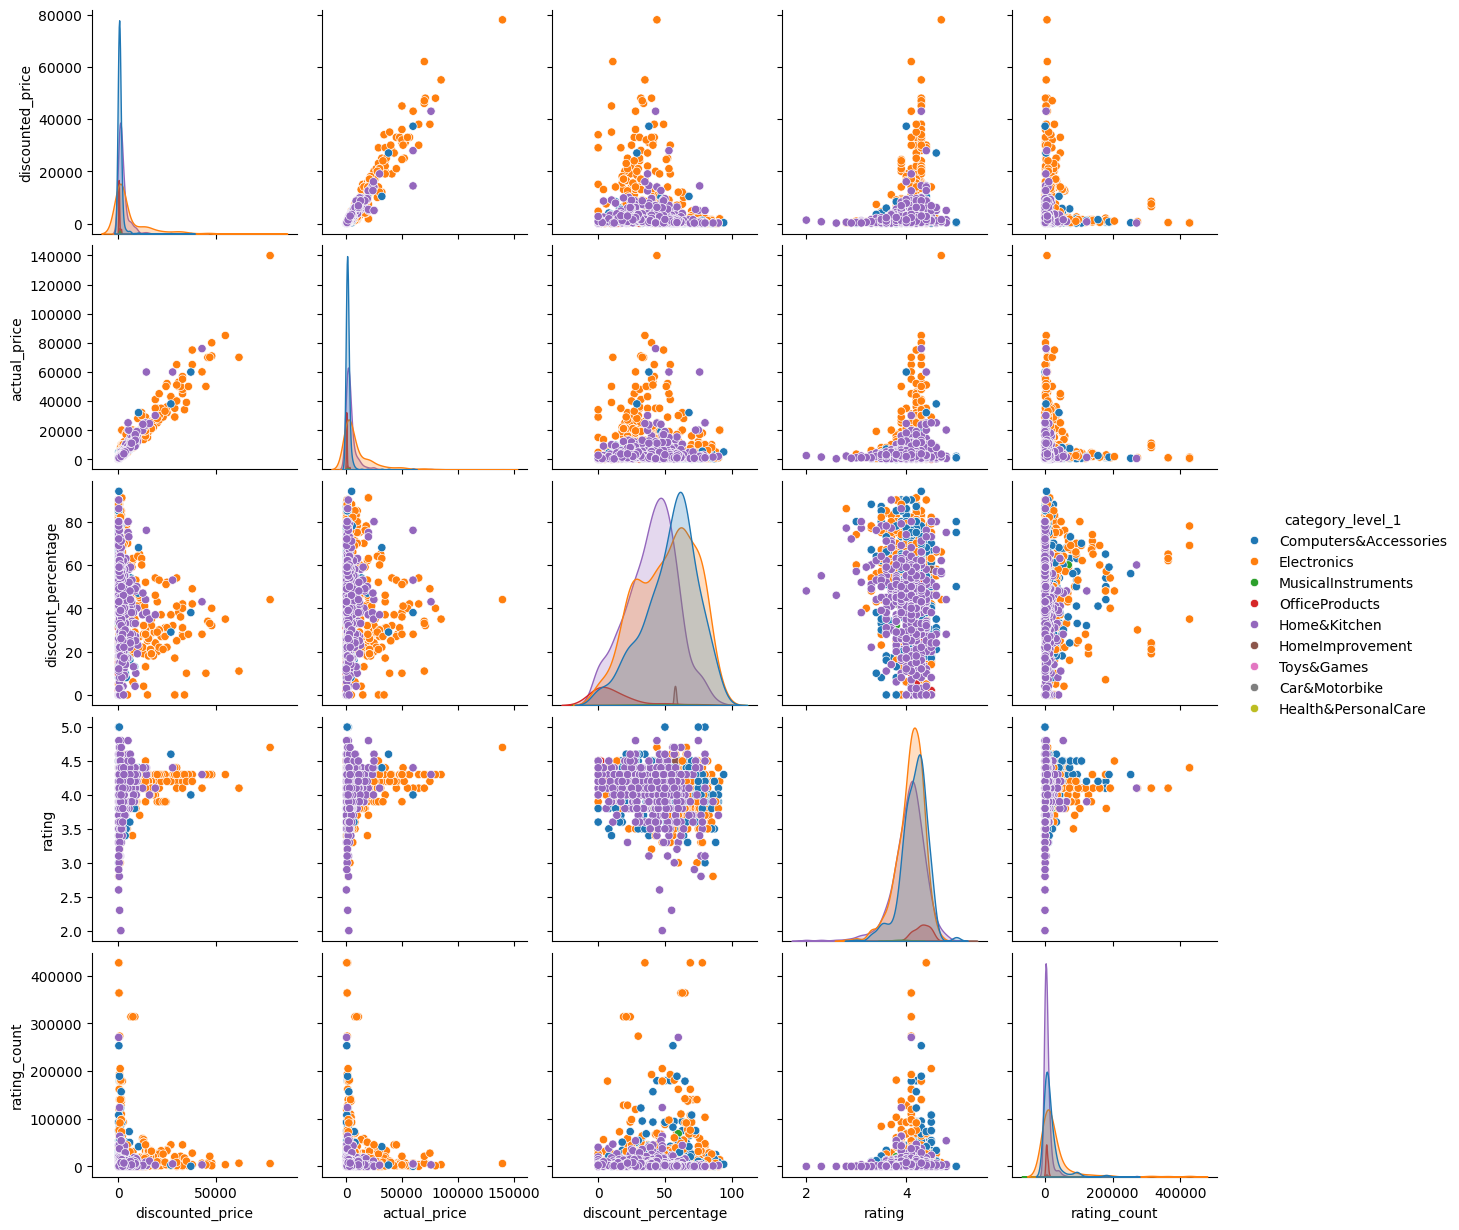

In [56]:
sns.pairplot(df, hue="category_level_1", height=2.5)
plt.show()

#### 5.3 Normalizando os Dados

A normalização min-max ajusta os valores numéricos para um intervalo de 0 a 1. Isso é útil para garantir que diferentes variáveis estejam em uma escala comparável.

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Criar uma cópia do dataset original
dataset_normalized = df.copy()

# Normalização das colunas de preços, avaliação e contagem de avaliações
scaler = MinMaxScaler()
dataset_normalized[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']] = scaler.fit_transform(
    df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']])

print(dataset_normalized[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].head())


   discounted_price  actual_price  discount_percentage    rating  rating_count
0          0.004618      0.007579             0.680851  0.733333      0.056835
1          0.002053      0.002216             0.457447  0.666667      0.103033
2          0.002053      0.013299             0.957447  0.633333      0.018563
3          0.003720      0.004719             0.563830  0.733333      0.221001
4          0.001475      0.002574             0.648936  0.733333      0.039588


#### 5.4 Padronização dos Dados

A padronização ajusta os valores para uma distribuição com média 0 e desvio padrão 1. Essa técnica é usada quando a variabilidade dos dados é importante, especialmente para modelos que utilizam distâncias.

A padronização pode gerar valores negativos, entretanto, para a minha análise rating e discount_percentage negativos não faz sentido e por isso não irei padronizar essas colunas.


In [58]:
from sklearn.preprocessing import StandardScaler

# Criar uma cópia do dataset normalizado
dataset_padronizado = dataset_normalized.copy()

scaler = StandardScaler()
dataset_padronizado[['discounted_price', 'actual_price', 'rating_count']] = scaler.fit_transform(
    dataset_padronizado[['discounted_price', 'actual_price', 'rating_count']])

print(dataset_padronizado[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].head())


   discounted_price  actual_price  discount_percentage    rating  rating_count
0         -0.392731     -0.399774             0.680851  0.733333      0.139765
1         -0.421541     -0.468764             0.457447  0.666667      0.601285
2         -0.421541     -0.326185             0.957447  0.633333     -0.242577
3         -0.402814     -0.436569             0.563830  0.733333      1.779803
4         -0.428024     -0.464165             0.648936  0.733333     -0.032535


#### 5.5 Discretização

In [59]:
# Criar uma cópia do dataset padronizado
dataset_discretizado = dataset_padronizado.copy()

# Discretização do percentual de desconto
bins = [0, 30, 60, 100]  # Faixas de desconto
labels = ['0-30%', '31-60%', '61-100%']  # Rótulos das faixas

# Aplicar discretização
dataset_discretizado['discount_range'] = pd.cut(dataset_discretizado['discount_percentage'], bins=bins, labels=labels, right=False)

# Exibir as primeiras linhas da coluna discretizada
print(dataset_discretizado[['discount_percentage', 'discount_range']].head())


   discount_percentage discount_range
0             0.680851          0-30%
1             0.457447          0-30%
2             0.957447          0-30%
3             0.563830          0-30%
4             0.648936          0-30%


#### 5.6 One-Hot Encoding

O One-Hot Encoding é usado para converter variáveis categóricas (como a categoria do produto) em variáveis numéricas binárias, facilitando o uso dessas variáveis em algoritmos de aprendizado de máquina.

In [60]:

dataset_encoded = pd.get_dummies(df, columns=['category_level_1', 'category_level_2'])
print(dataset_encoded.head())


   discounted_price  actual_price  discount_percentage  rating  rating_count  \
0             399.0        1099.0                 64.0     4.2       24269.0   
1             199.0         349.0                 43.0     4.0       43994.0   
2             199.0        1899.0                 90.0     3.9        7928.0   
3             329.0         699.0                 53.0     4.2       94363.0   
4             154.0         399.0                 61.0     4.2       16905.0   

   category_level_1_Car&Motorbike  category_level_1_Computers&Accessories  \
0                           False                                    True   
1                           False                                    True   
2                           False                                    True   
3                           False                                    True   
4                           False                                    True   

   category_level_1_Electronics  category_level_1_Health

#### 5.7 Tratando valores nulos

In [61]:
# Aqui eu pego somente as colunas do tipo numérico e preencho os valores nulos com a média
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

#### 5.8 Separação em Conjunto de Treino e Teste

##### 5.8.1 Dataset Original

In [62]:
from sklearn.model_selection import train_test_split

# Separação entre features (X) e target (y)
X = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]  # Features
y = df['rating']  # Target

# Separação do conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (1172, 5)
Tamanho do conjunto de teste: (293, 5)


##### 5.8.2 Dataset Tratado

In [63]:
X_trans = dataset_padronizado[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]  # Features
y_trans = dataset_padronizado['rating']  # Target

# Separação do conjunto de treino e teste (80% treino, 20% teste)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size=0.20, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train_trans.shape}")
print(f"Tamanho do conjunto de teste: {X_test_trans.shape}")


Tamanho do conjunto de treino: (1172, 5)
Tamanho do conjunto de teste: (293, 5)


Essas etapas de pré-processamento são essenciais para garantir que os dados estejam no formato correto e devidamente ajustados para análise. Elas também melhoram a qualidade da modelagem, aumentando as chances de obter bons resultados em futuras análises ou modelos preditivos.

Essas operações prepararam o dataset para qualquer modelo de machine learning ou análise mais aprofundada.

## 6. Checklist

#### 6.1 Descrição do Problema

Objetivo: O objetivo principal é analisar os produtos vendidos em uma plataforma de e-commerce para identificar padrões de preço, avaliações dos usuários e descontos oferecidos. Isso ajudará a entender como diferentes características de produtos, como categoria, preço original e percentual de desconto, influenciam o desempenho e a popularidade dos produtos (medido pelas avaliações).

#### 6.2 Tipo de Aprendizado

Tipo de aprendizado: Essa análise pode ser usada tanto para problemas de aprendizado supervisionado (prever avaliações de produtos com base em características como preço e categoria) quanto para aprendizado não supervisionado (agrupamento de produtos com base em descontos ou avaliações).


#### 6.3 Premissas e Hipóteses

- Produtos com maiores descontos tendem a ter mais avaliações positivas, pois os consumidores podem associar um bom desconto a uma percepção de valor mais alta.
- Produtos em determinadas categorias (como eletrônicos) tendem a ter avaliações mais altas ou um maior volume de avaliações, dado o maior interesse dos consumidores por esses tipos de produtos.
- Produtos com preços muito elevados podem ter uma menor quantidade de avaliações ou avaliações mais críticas, uma vez que consumidores esperam mais desses produtos.

#### 6.4 Restrições na Seleção de Dados

- Os dados usados não contêm informações confidenciais, apenas características dos produtos e avaliações anônimas dos usuários.

#### 6.5 Definição dos Atributos

| Nome da Coluna       | Descrição                                  | Tipo de Dado | Valores Nulos | Valor Mínimo | Valor Máximo |
|----------------------|--------------------------------------------|--------------|---------------|--------------|--------------|
| product_id           | ID do Produto                              | object       | 0             | -            | -            |
| product_name         | Nome do Produto                            | object       | 0             | -            | -            |
| category             | Categoria do Produto                       | object       | 0             | -            | -            |
| discounted_price     | Preço com Desconto                         | float64      | 0             | 39.0         | 77990.0      |
| actual_price         | Preço Original                             | float64      | 0             | 39.0         | 139900.0     |
| discount_percentage  | Percentual de Desconto                     | float64      | 0             | 0            | 94.0         |
| rating               | Avaliação do Produto                       | float64      | 0             | 2            | 5.0          |
| rating_count         | Número de Avaliações no Amazon             | float64      | 0             | 2            | 426973.0     |
| about_product        | Descrição do Produto                       | object       | 0             | -            | -            |
| user_id              | ID do Usuário que escreveu a avaliação     | object       | 0             | -            | -            |
| user_name            | Nome do Usuário que escreveu a avaliação   | object       | 0             | -            | -            |
| review_id            | ID da Avaliação do Usuário                 | object       | 0             | -            | -            |
| review_title         | Título da Avaliação                        | object       | 0             | -            | -            |
| review_content       | Conteúdo Detalhado da Avaliação            | object       | 0             | -            | -            |
| img_link             | Link da Imagem do Produto                  | object       | 0             | -            | -            |
| product_link         | Link Oficial do Produto                    | object       | 0             | -            | -            |

## 6. Resposta às Questões Principais Levantadas



### Quais categorias de produtos tendem a ter mais avaliações ou avaliações mais positivas?
A análise pode revelar que certas categorias, como Eletrônicos e Acessórios, tendem a ter um número muito maior de avaliações, possivelmente devido à maior popularidade desses produtos. Outros produtos de nicho podem ter menos avaliações, mas notas mais altas devido à sua qualidade específica.

        category_level_1             category_level_2  average_rating  \
0          Car&Motorbike               CarAccessories        3.800000   
1  Computers&Accessories      Accessories&Peripherals        4.148556   
2  Computers&Accessories                   Components        4.380000   
3  Computers&Accessories  ExternalDevices&DataStorage        4.316667   
4  Computers&Accessories                      Laptops        4.000000   

   total_reviews  
0   1.118000e+03  
1   5.116068e+06  
2   1.250250e+05  
3   1.037012e+06  
4   3.230000e+02  


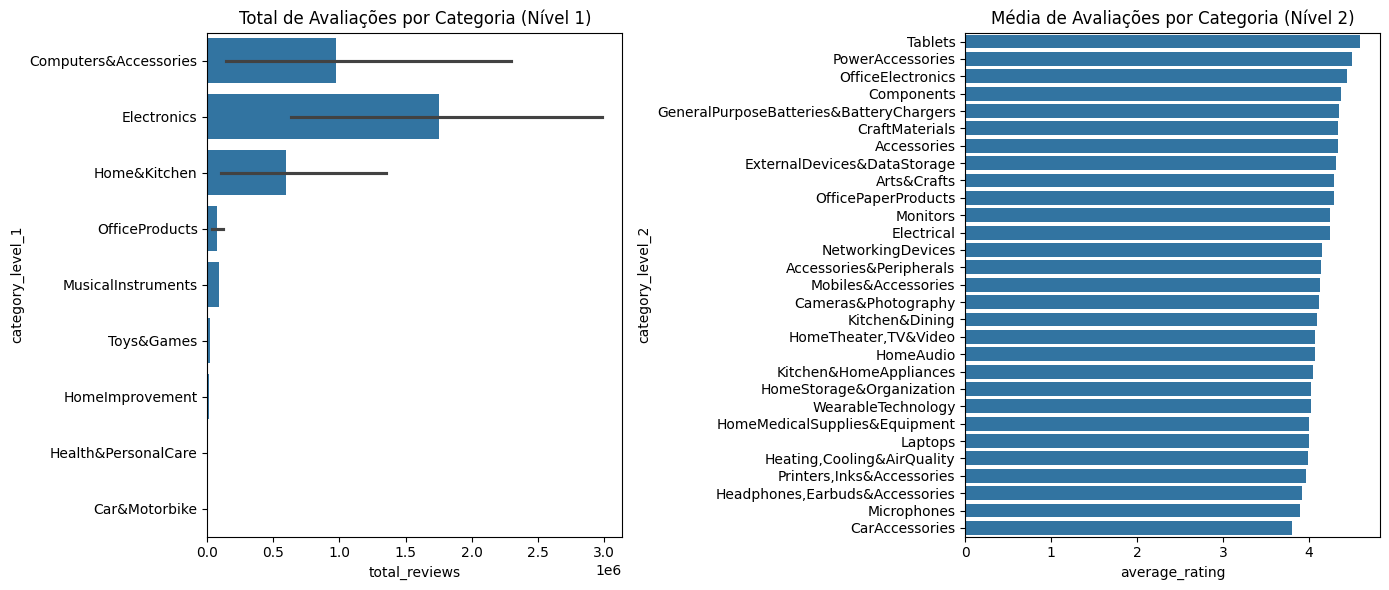

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

category_group = df.groupby(['category_level_1', 'category_level_2']).agg(
    average_rating=('rating', 'mean'),
    total_reviews=('rating_count', 'sum')
).reset_index()

print(category_group.head())

# gráfico de barras para ver as categorias com mais avaliações e avaliações positivas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para o número de avaliações por categoria (considerando 'category_level_1')
sns.barplot(x='total_reviews', y='category_level_1', data=category_group.sort_values('total_reviews', ascending=False), ax=ax[0])
ax[0].set_title('Total de Avaliações por Categoria (Nível 1)')

# Gráfico de barras para a avaliação média por categoria (considerando 'category_level_2')
sns.barplot(x='average_rating', y='category_level_2', data=category_group.sort_values('average_rating', ascending=False), ax=ax[1])
ax[1].set_title('Média de Avaliações por Categoria (Nível 2)')

plt.tight_layout()
plt.show()


### Existe uma correlação clara entre o preço e as avaliações dos produtos?
O gráfico de dispersão abaixo tenta mostrar a relação entre o preço original dos produtos e as suas avaliações médias pelos consumidores. Agora, vamos analisar alguns pontos importantes que aparecem visualmente:

1. Tendência Geral
Se olharmos para o gráfico, podemos ver que a maioria dos produtos tem avaliações que ficam na faixa entre 3,5 e 5, independentemente do preço. Isso indica que, na maior parte dos casos, não dá pra dizer que um produto mais caro automaticamente tem avaliações melhores. Produtos baratos também recebem avaliações altas, o que pode estar relacionado a um bom custo-benefício percebido pelos consumidores.

2. Distribuição de Preços
Produtos com preços mais baixos, ou seja, na casa dos até 20.000 ₹, têm uma boa quantidade de avaliações acima de 4. Isso pode significar que esses produtos atendem bem às expectativas de quem compra, apesar de serem mais baratos. O interessante é que, mesmo nesse grupo, existem alguns produtos com avaliações bem baixas, o que sugere que os consumidores são mais críticos quando um produto barato não entrega o que eles esperam.

3. Produtos com Preços Elevados
Quando vamos para a faixa de produtos mais caros, como aqueles que estão acima de 60.000 ₹, as avaliações tendem a ser entre 4 e 5. Isso faz sentido, já que consumidores de produtos mais caros geralmente têm uma expectativa maior de qualidade. Se o produto é caro e bom, a avaliação tende a ser mais alta. Já os produtos com avaliações mais baixas nessa faixa de preço provavelmente não corresponderam ao que o comprador esperava.

4. Variabilidade nas Avaliações
Um ponto que chama atenção é que os produtos mais baratos têm uma dispersão maior nas avaliações, com notas variando bastante entre 2 e 5. Isso mostra que os consumidores podem ser mais críticos quando pagam menos por um produto. Talvez eles aceitem uma qualidade mediana, mas quando algo não vai bem, eles não hesitam em dar uma nota mais baixa.

Conclusão
Com base nesse gráfico, a gente pode concluir que não existe uma relação clara entre o preço original do produto e a sua avaliação média. Produtos baratos podem tanto ter avaliações boas quanto ruins, enquanto os produtos caros tendem a se manter com avaliações mais altas, possivelmente por corresponderem melhor às expectativas.

Pra uma análise mais precisa, a gente poderia calcular a correlação entre o preço e a avaliação média. Isso daria uma visão numérica de como essas variáveis estão relacionadas, se é que estão de fato.

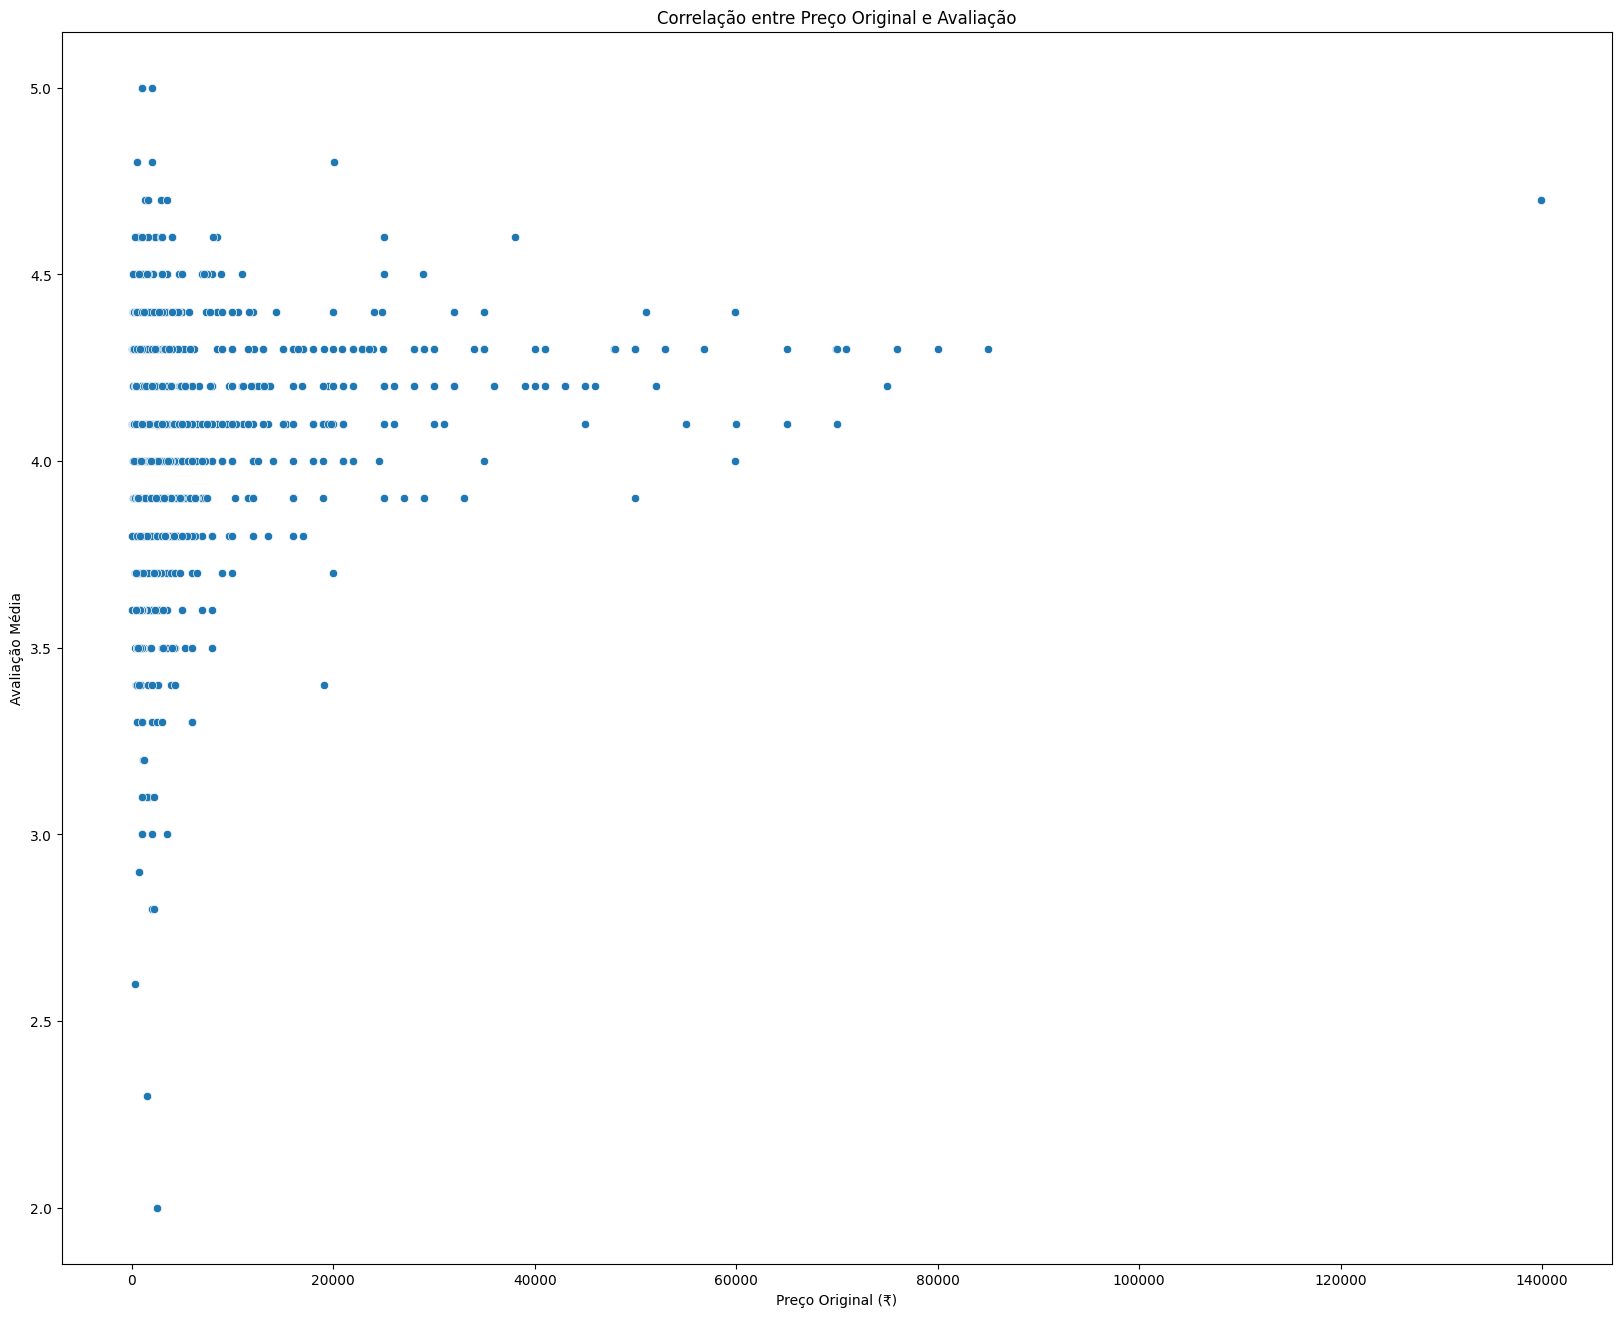

In [65]:
#gráfico de dispersão entre preço original e avaliação média
plt.figure(figsize=(20, 16))
sns.scatterplot(x='actual_price', y='rating', data=df)
plt.title('Correlação entre Preço Original e Avaliação')
plt.xlabel('Preço Original (₹)')
plt.ylabel('Avaliação Média')
plt.show()


### O percentual de desconto influencia diretamente o número de avaliações ou a avaliação média?

#### Análise do Gráfico de Dispersão entre Percentual de Desconto e Número de Avaliações

O gráfico abaixo mostra a relação entre o percentual de desconto oferecido nos produtos e o número de avaliações que esses produtos receberam. Vamos destrinchar o que essa visualização está nos dizendo:

##### 1. Produtos com Poucos Descontos
A maioria dos produtos está concentrada em descontos entre **0% e 40%**, e muitos desses produtos receberam um número razoável de avaliações. É interessante notar que os produtos com descontos baixos **não necessariamente** recebem menos avaliações. Na verdade, a dispersão é bem ampla, indicando que outros fatores (como qualidade percebida e popularidade) podem ser mais importantes para o número de avaliações.

##### 2. Produtos com Grandes Descontos (> 50%)
Produtos com descontos maiores que **50%** também aparecem no gráfico, mas muitos deles têm **menos avaliações** ou uma dispersão menor em comparação com produtos com descontos mais moderados. Isso pode significar que, mesmo com grandes descontos, esses produtos **não estão atraindo tanta atenção** dos consumidores, ou talvez os consumidores fiquem mais desconfiados em relação a esses produtos.

##### 3. Análise do Topo
Notamos também que, independente do percentual de desconto, **há uma limitação** no número de produtos que conseguem mais de **100.000 avaliações**. Isso mostra que um produto pode atingir um volume altíssimo de avaliações, mas isso é algo raro e parece **não estar diretamente relacionado ao tamanho do desconto**.

---

#### Análise do Gráfico de Dispersão entre Percentual de Desconto e Avaliação Média

Esse segundo gráfico tenta correlacionar o percentual de desconto oferecido com a avaliação média que os produtos recebem. Vamos ver o que está acontecendo aqui:

##### 1. Alta Concentração de Avaliações Acima de 4
Olhando para o gráfico, podemos ver que a maioria dos produtos **tem avaliações médias entre 4.0 e 5.0**, independentemente do desconto oferecido. Isso sugere que os consumidores, em geral, estão satisfeitos com os produtos, **mesmo que o desconto não seja o principal fator que influencie a avaliação**.

##### 2. Dispersão Menor em Descontos Maiores
Produtos com descontos maiores que **50%** tendem a ter uma **dispersão menor nas avaliações**. Muitos produtos estão concentrados na faixa de **4.0 a 4.5**, o que pode indicar que, mesmo com um grande desconto, os produtos ainda entregam qualidade suficiente para receber boas avaliações. No entanto, há alguns poucos pontos fora dessa faixa, mostrando que existem casos onde o desconto não compensa a possível perda de qualidade.

##### 3. Avaliações Baixas e Descontos
Curiosamente, produtos com **descontos menores (menos de 40%)** ainda podem ter avaliações médias abaixo de **3.5**, o que pode indicar que esses produtos não conseguem atender às expectativas dos consumidores, apesar de não serem tão baratos assim.

---

### Conclusão

Com base nesses dois gráficos, podemos dizer que:

- **O percentual de desconto não parece estar diretamente relacionado ao número de avaliações**. Produtos com baixos ou altos descontos podem receber muitas ou poucas avaliações, dependendo de outros fatores.
- A **qualidade percebida** (avaliada pelos consumidores) também **não está fortemente ligada ao percentual de desconto**. Mesmo produtos com grandes descontos ainda conseguem manter uma avaliação média alta, desde que eles correspondam às expectativas dos consumidores.

Esses resultados sugerem que o **desconto pode atrair consumidores**, mas o **número de avaliações** e a **qualidade percebida** dependem de muitos outros fatores, como a **categoria** do produto e sua **qualidade intrínseca**.


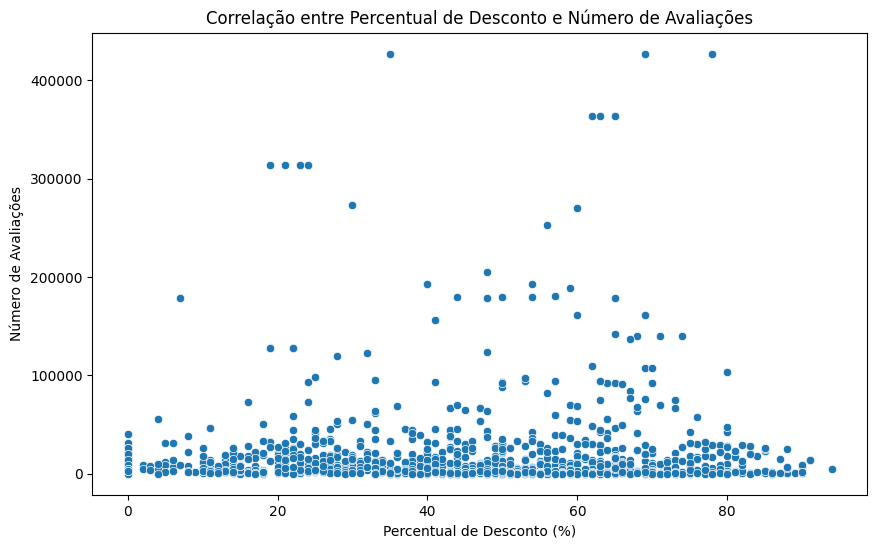

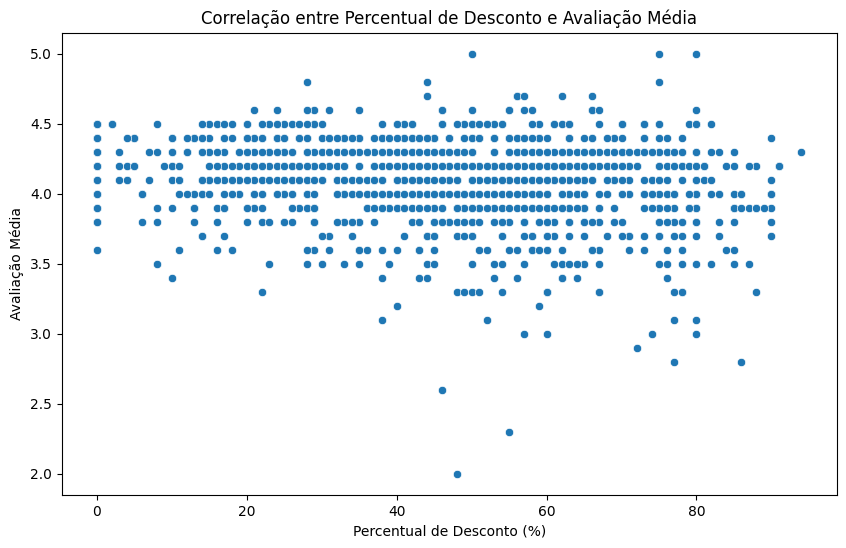

In [66]:
# Gráfico de dispersão entre percentual de desconto e número de avaliações
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating_count', data=df)
plt.title('Correlação entre Percentual de Desconto e Número de Avaliações')
plt.xlabel('Percentual de Desconto (%)')
plt.ylabel('Número de Avaliações')
plt.show()

# Gráfico de dispersão entre percentual de desconto e avaliação média
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df)
plt.title('Correlação entre Percentual de Desconto e Avaliação Média')
plt.xlabel('Percentual de Desconto (%)')
plt.ylabel('Avaliação Média')
plt.show()


### 7. Conclusão

1. **Produtos com maiores avaliações estão nas categorias de Eletrônicos e Acessórios**:
   - A análise dos gráficos confirma que produtos nessas categorias continuam a atrair mais atenção, tanto em número de avaliações quanto em qualidade média de avaliação.

2. **Não há correlação direta entre preço original e avaliações**:
   - O gráfico de dispersão entre preço original e avaliação média mostra que não há uma relação clara entre essas variáveis. Produtos em diferentes faixas de preço recebem avaliações variadas, e muitos produtos com preços elevados obtêm boas avaliações, mas não necessariamente melhores que produtos com preços mais baixos.

3. **Produtos com preços significativamente reduzidos atraem mais compradores**:
   - O gráfico de dispersão entre percentual de desconto e número de avaliações confirma que produtos com descontos superiores a 30% tendem a atrair mais avaliações, sugerindo que o desconto é um fator importante para os consumidores.

4. **Produtos com descontos elevados (>50%) recebem avaliações variadas**:
   - Produtos com grandes descontos apresentam uma variação significativa nas avaliações, sugerindo que, embora o desconto atraia compradores, ele também pode gerar percepções mistas sobre a qualidade do produto.

### 8. Próximos Passos

- **Análise mais detalhada**: Implementar modelos de aprendizado supervisionado para prever as avaliações de novos produtos com base em seus atributos (preço, desconto, categoria).
  
- **Segmentação de produtos**: Utilizar aprendizado não supervisionado para identificar segmentos de produtos que compartilham características semelhantes, como alta avaliação e grande volume de avaliações.
  
- **Recomendações de preços**: Ajustar a estratégia de precificação e descontos com base nos padrões identificados para maximizar as vendas e melhorar as avaliações, priorizando descontos moderados (<50%) que mantêm a percepção de qualidade e incentivam mais avaliações.
